In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('data.csv')
df = df.drop_duplicates()
mondic = {
    'jan': 1,
    'feb': 2,
    'mar': 3,
    'apr': 4,
    'may': 5,
    'jun': 6,
    'jul': 7,
    'aug':8,
    'sep':9,
    'oct':10,
    'nov':11,
    'dec':12
}
df.mon = df.mon.replace(mondic)


In [3]:
df

,age,job,marital,education_qual,call_type,day,mon,dur,num_calls,prev_outcome,y
0,58,management,married,tertiary,unknown,5,5,261,1,unknown,no
1,44,technician,single,secondary,unknown,5,5,151,1,unknown,no
2,33,entrepreneur,married,secondary,unknown,5,5,76,1,unknown,no
3,47,blue-collar,married,unknown,unknown,5,5,92,1,unknown,no
4,33,unknown,single,unknown,unknown,5,5,198,1,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,cellular,17,11,977,3,unknown,yes
45207,71,retired,divorced,primary,cellular,17,11,456,2,unknown,yes
45208,72,retired,married,secondary,cellular,17,11,1127,5,success,yes
45209,57,blue-collar,married,secondary,telephone,17,11,508,4,unknown,no


In [4]:
# lable encoding for y
# ordinal cncoding for education_qual
# onehot for for job, martial, call_type, prev_outcome


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(df.drop(columns=['y']),df.y,test_size=0.25,random_state=0)

In [6]:
from sklearn.compose import  ColumnTransformer
transformer = ColumnTransformer(transformers=[
    ('tnf1',OrdinalEncoder(categories=[['unknown','primary','secondary','tertiary']]),['education_qual']),
    ('tnf2',OneHotEncoder(sparse=False,drop='first'),['job','marital','call_type','prev_outcome'])
],remainder='passthrough')

In [7]:
new_X_train = transformer.fit_transform(X_train)
new_X_test  = transformer.transform(X_test)

In [ ]:
# yes_df = df[df['y'] == 'yes']
# yes_df = yes_df.drop(columns='y')
# yes_df

In [8]:
le = LabelEncoder()
le.fit(Y_train)
Y_train = le.transform(Y_train)
Y_test =  le.transform(Y_test)


In [9]:
Y_train

array([0, 0, 0, ..., 0, 1, 0])

In [10]:
from sklearn.linear_model import LogisticRegression #main code that build the LR model 
logistic_regression= LogisticRegression() #initialise the required package
logistic_regression.fit(new_X_train,Y_train) #magic happens - best values of betas - training/learning happens here
y_pred_log=logistic_regression.predict(new_X_test)

c:\Users\saina\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [260]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(new_X_train,Y_train)


GaussianNB()

In [263]:
nb_proba = nb.predict_proba(new_X_test)
nb_proba = nb_proba[:,1]
nb_proba

array([2.11451834e-03, 1.27521315e-02, 4.81884500e-02, ...,
       2.71386878e-04, 8.54677684e-04, 9.99999945e-01])

In [217]:
pd.DataFrame([y_pred_log,Y_test]).T

,0,1
0,0,1
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
11297,0,0
11298,0,0
11299,0,0
11300,0,0


In [218]:
from sklearn import metrics

print(metrics.confusion_matrix(Y_test, y_pred_log))
print(metrics.classification_report(Y_test, y_pred_log,digits=3))

[[9751  216]
 [ 948  387]]
              precision    recall  f1-score   support

           0      0.911     0.978     0.944      9967
           1      0.642     0.290     0.399      1335

    accuracy                          0.897     11302
   macro avg      0.777     0.634     0.672     11302
weighted avg      0.880     0.897     0.879     11302



In [272]:
from sklearn.metrics import roc_curve,roc_auc_score
l_auc = roc_auc_score(Y_test,y_pred_log)
l_frp,l_trp, _ =roc_curve(Y_test,y_pred_log)
nb_auc = roc_auc_score(Y_test,nb_proba)
nb_frp,nb_trp, _ =roc_curve(Y_test,nb_proba)
svm_auc = roc_auc_score(Y_test,y_pred_svm)
svm_frp,svm_trp, _ =roc_curve(Y_test,y_pred_svm)

c:\Users\91984\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

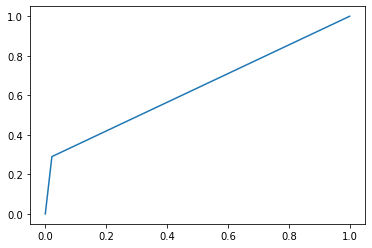

In [259]:
sns.lineplot(l_frp,l_trp)

c:\Users\91984\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

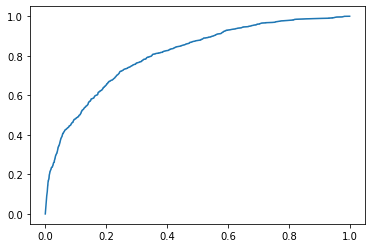

In [267]:
sns.lineplot(nb_frp,nb_trp)


c:\Users\91984\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

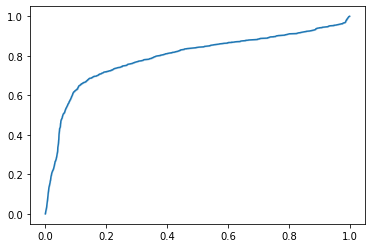

In [278]:
sns.lineplot(svm_frp,svm_trp)

In [268]:
from sklearn.svm import SVC
model_svc = SVC(kernel="rbf")
model_svc.fit(new_X_train,Y_train)


SVC()

In [269]:
y_pred_svm = model_svc.decision_function(new_X_test)


In [281]:
nb_auc

0.8069370119897534